In [138]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check torch Version
torch.__version__

'2.2.1+cu121'

## Data Preparing and Loading

In [139]:
# Create Known Parameters

weight = 0.7
bias = 0.3

##Create
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X +bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [140]:
len(X),len(y)

(50, 50)

In [141]:
## spliting data into training and test sets

In [142]:

## Create a train/test split

train_split = int(0.8*len(X))

train_split

X_train,y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [143]:
## How can we visualize??

In [144]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
  """
  Plots training data, test data and compare predictions.

  """

  plt.figure(figsize=(10,7))
  #Plotting Data in Blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")


  #Plot test data in green
  plt.scatter(test_data,test_labels,c='g',s=4,label="Testing Data")

  #Are there predicitions?
  if predictions is not None:
    #Plot the predicitions if they exist
    plt.scatter(test_data, predictions,c='r',s=4,label="Predicitions")

  #Show the Legend

  plt.legend(prop={"size":14});

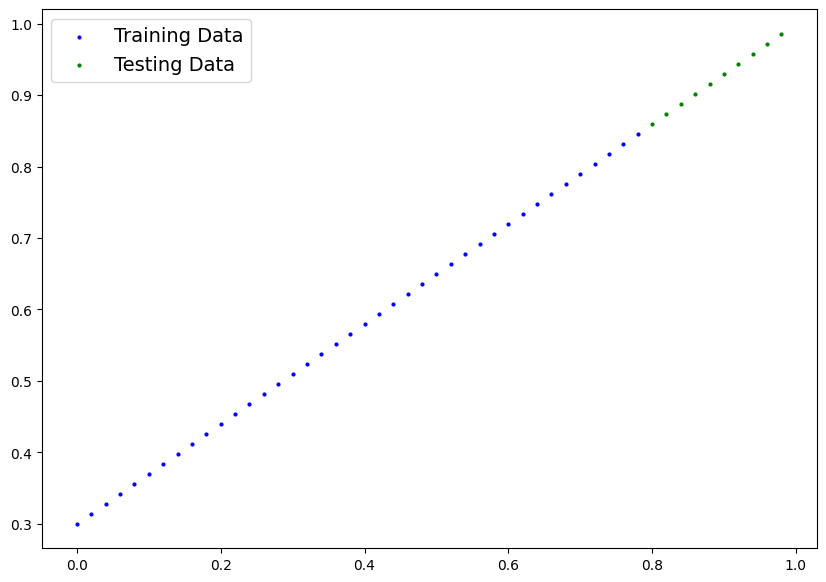

In [145]:
plot_predictions();

In [146]:
from torch import nn

## Building Model in Pytorch

In [147]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #initialize model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad =True,
                                            dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    #Forward methord to define the computation in the model

  def forward(self,x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights*x+self.bias  # This is the linear regression formula

In [148]:
# our class LinearRegressionModel subclasses nn module(nn. module contains all the buildin blocks of neural network)

#initialize model parameters - initilase model parameters to be used in various computations(these could be different layers from torch.nn,single parameters,hard-coded values or funntions)

# Forward() defines the computation in the model

## PyTorch model building essentials
###### PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

###### They are torch.nn, torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader. For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

In [149]:
# torch.nn: Contains all of the building blocks for computational graphs, which are
# essentially a series of computations executed in a particular way.

# torch.nn.Parameter: Stores tensors that can be used with nn.Module. If requires_grad=True,
# gradients are calculated automatically, which is often referred to as "autograd".

# torch.nn.Module: The base class for all neural network modules. All the building blocks for
# neural networks are subclasses. If you're building a neural network in PyTorch, your models
# should subclass nn.Module. Requires a forward() method to be implemented.

# torch.optim: Contains various optimization algorithms. These tell the model parameters stored
# in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss.

# def forward(): All nn.Module subclasses require a forward() method. This defines the computation
# that will take place on the data passed to the particular nn.Module (e.g., the computations
# performed by a linear regression model).


In [150]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [151]:
#List named paramteters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [152]:
weight, bias

(0.7, 0.3)

## Making predictions using torch.inference_mode()

---


#### To check this we can pass it the test data X_test to see how closely it predicts y_test.

#### When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

In [153]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [154]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [155]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [156]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


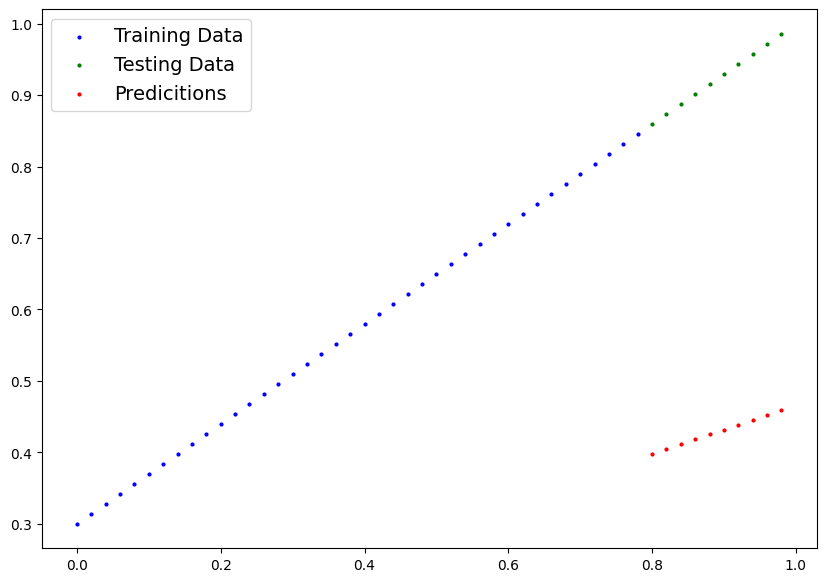

In [157]:
plot_predictions(predictions=y_preds)

#3. Train model
####Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

####To fix that, we can update its internal parameters (I also refer to parameters as patterns), the weights and bias values we set randomly using nn.Parameter() and torch.randn() to be something that better represents the data.

####We could hard code this (since we know the default values weight=0.7 and bias=0.3) but where's the fun in that?

####Much of the time you won't know what the ideal parameters are for a model.

####Instead, it's much more fun to write code to see if the model can try and figure them out itself.

In [158]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

## Building a training anad a testing loop in pytorch

#### a couple of things we need in a training loop:

#### 0. Loop through the data and do....................
#### 1. Forward pass(this involvers  data moving through our model's 'forward()' functions) - also called forward propogation

#### 2. calculate the loss functin

#### 3. optimizer zero grad

#### 4. loss backward - move backwards thorugh the network to calculate the gradients of each of the parameter of our model with respect of loss

#### 5. optimizer step

In [159]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())  # appends in train_loss_values
            test_loss_values.append(test_loss.detach().numpy()) # appends in test_loss_values
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


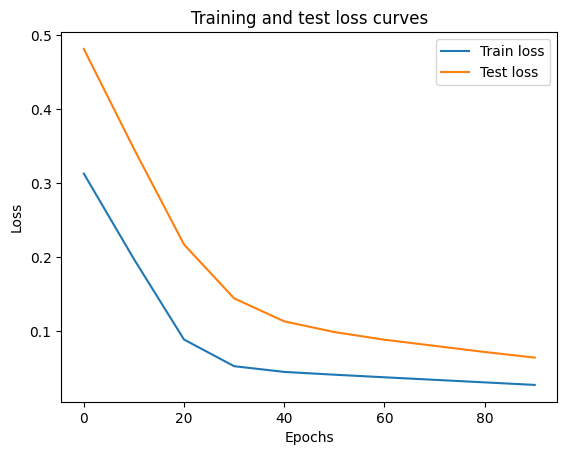

In [160]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## 5. Saving and loading a PyTorch model

In [161]:
## torch.save	Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
## torch.load	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
## torch.nn.Module.load_state_dict	Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

In [162]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)



In [163]:
# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME



In [164]:
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [165]:
model_0

LinearRegressionModel()

In [166]:
! ls models

01_pytorch_workflow_model_0.pth


In [167]:
## Loading a Pytorch model

# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [168]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [169]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [172]:
# Check if model definition is consistent
print("Model architecture:", LinearRegressionModel())

# Confirm that weights are loaded from the correct path and print some of the loaded weights
model_state_dict = torch.load("/content/models/01_pytorch_workflow_model_0.pth")
print("Some loaded weights:", {k: v for k, v in model_state_dict.items() if k.endswith('.weight') or k.endswith('.bias')})

# Check predictions immediately after loading to exclude other variables
new_model = LinearRegressionModel()
new_model.load_state_dict(model_state_dict)
new_model.eval()

# Assuming `X_test` is properly preprocessed
with torch.inference_mode():
    new_predictions = new_model(X_test)
print("New loaded model predictions:", new_predictions)

# Compare with the loaded model predictions
print("Are new predictions close to loaded model predictions?", torch.isclose(loaded_model_preds, new_predictions, atol=1e-8).all())


Model architecture: LinearRegressionModel()
Some loaded weights: {}
New loaded model predictions: tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])
Are new predictions close to loaded model predictions? tensor(True)
